In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import wishart_lib, wishart_lib_stepan

import sys
sys.path.append("..")

from indexes import indexes_lib
from generator import generator_lib
import numpy as np
from matplotlib import pyplot as plt
import importlib

import sys
sys.path.append("..")
importlib.reload(wishart_lib_stepan)
importlib.reload(wishart_lib)
importlib.reload(indexes_lib)
importlib.reload(generator_lib)

<module 'generator.generator_lib' from '/home/mrplotva/time_series/wishart/../generator/generator_lib.py'>

<b>Functions for clusters and vectors</b>

In [4]:
from wishart_lib import Wishart
from wishart_lib_stepan import WishartClusterization
WISHART_R = 15
WISHART_U = 0.15
wishart = Wishart(WISHART_R, WISHART_U)

In [13]:
from indexes.indexes_lib import MeasureIndexes


calculator = MeasureIndexes(arr, w)

res = calculator.Calculate()
for key in res:
    print(key, res[key])

NameError: name 'w' is not defined

<b>Get centers for Clusters</b>

In [ ]:
from itertools import groupby
WISHART_R = 10
WISHART_U = 0.2
def get_centers(x_train):
    N = len(x_train[0])
    wishart = Wishart(WISHART_R, WISHART_U)
    labels = wishart.fit(x_train)
    sorted_by_cluster = sorted(range(len(labels)), key=lambda x: labels[x])
    centers = []
    for wi, cluster in groupby(sorted_by_cluster, lambda x: labels[x]):
        cluster = list(cluster)
        center = np.full(N, 0.0)
        for i in cluster:
            center += x_train[i]
        centers.append(center / len(cluster))

    return centers
    

In [7]:
def draw_everything(arr):
    xs = arr[:, 0]
    ys = arr[:, 1]
    plt.figure(figsize=(18, 12))
    plt.scatter(xs, ys)
    plt.show()
    xs = (xs - min(xs)) / max(xs)
    ys = (ys - min(ys)) / max(ys)
    for i in range(len(arr)):
        arr[i][0] = xs[i]
        arr[i][1] = ys[i]

    from indexes.indexes_lib import MeasureIndexes

    step = 30
    row_size = 3
    w, shots = wishart.fit_with_visualization(arr, step)
    plt.figure(figsize=(18, 12))
    plt.scatter(xs, ys, c=w, s=50, label=f'final noise_points: {w.tolist().count(0)}')
    plt.legend(loc='best')
    plt.show()
    # shots = shots[:10]
    fig, axs = plt.subplots(max((len(shots) + row_size - 1) // row_size, 2), row_size, figsize=(18,12))
    # scatter = ax.scatter(xs,ys,c=w,s=50)
    for i in range(len(shots)):
        axs[i // row_size, i % row_size].scatter(xs, ys, c=shots[i], s=50,)
        axs[i // row_size, i % row_size].set_title(f'step {i * step} noise_points: {shots[i].tolist().count(0)}')
    plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
    plt.show()
    calculator = MeasureIndexes(arr, w)

    res = calculator.Calculate()
    for key in res:
        print(key, res[key])

<b>Default generation</b>

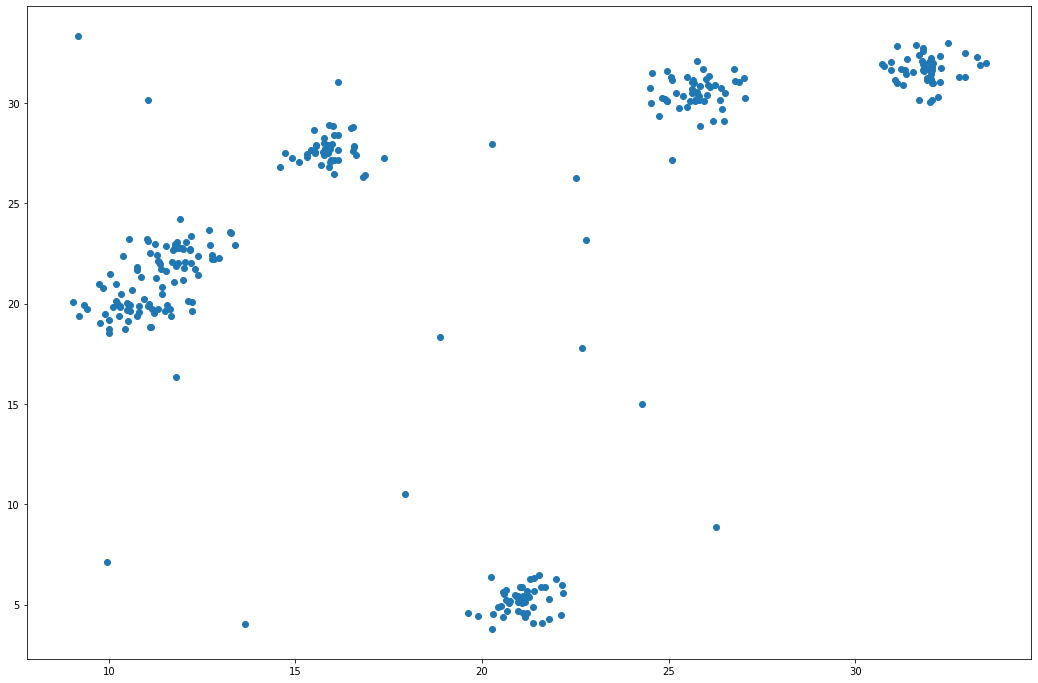

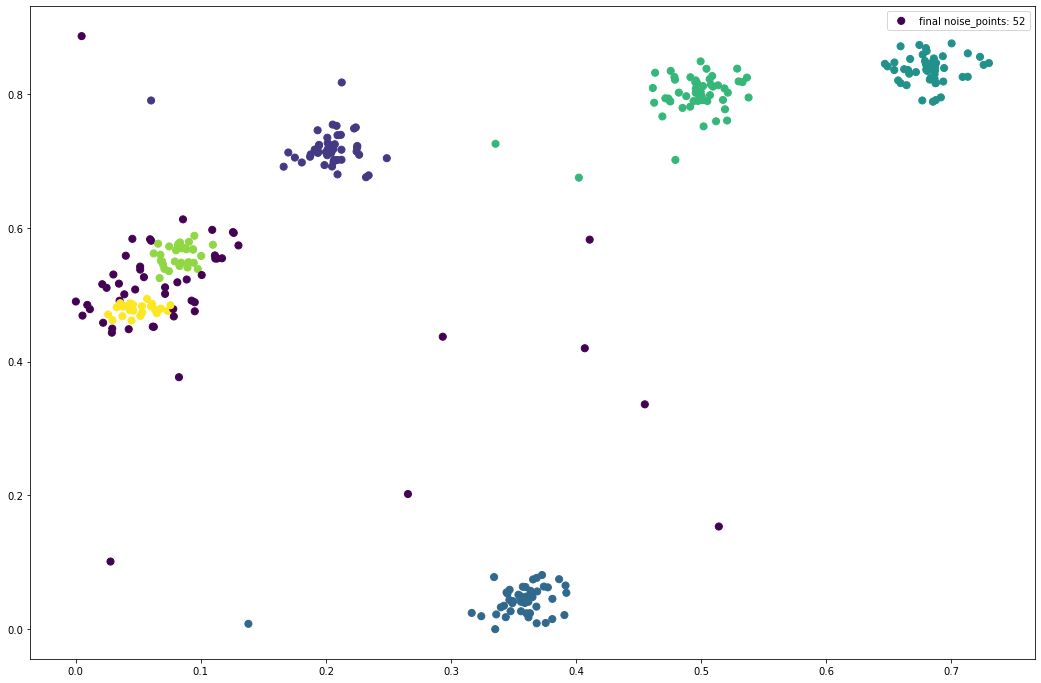

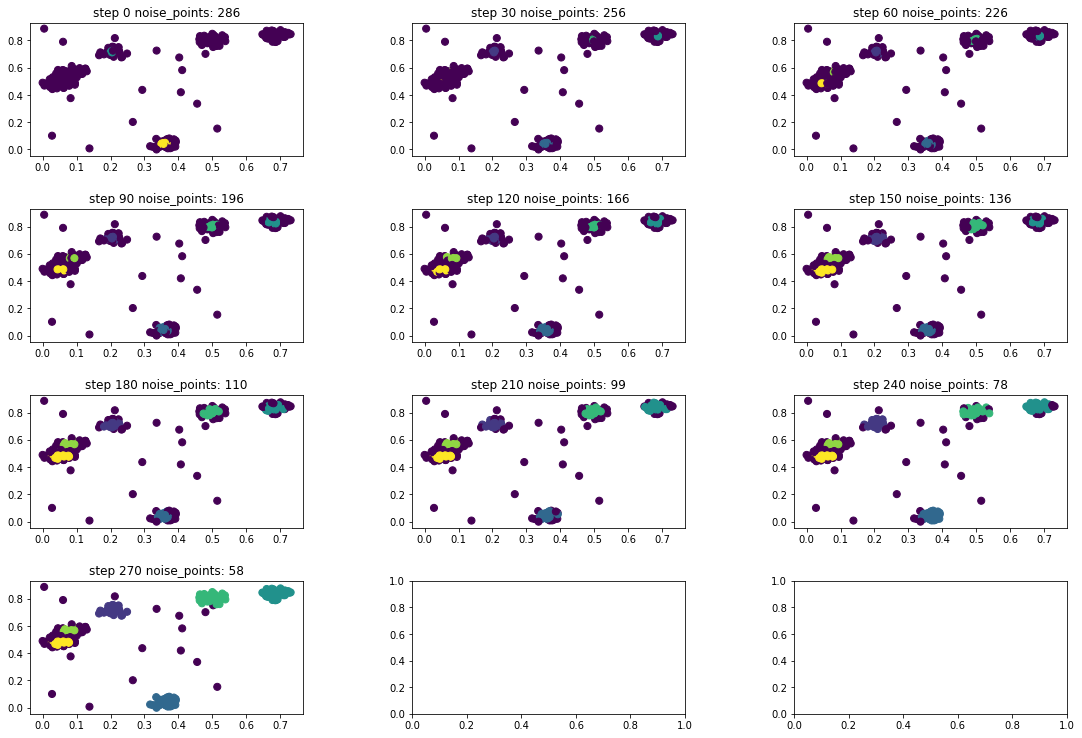

In [8]:
from generator.generator_lib import  Generator
generator = Generator(4.0, 40, 300, 6)
res, noise_points = generator.generate_with_noise(5, ret_points=True)
arr = np.array(res)
draw_everything(arr)

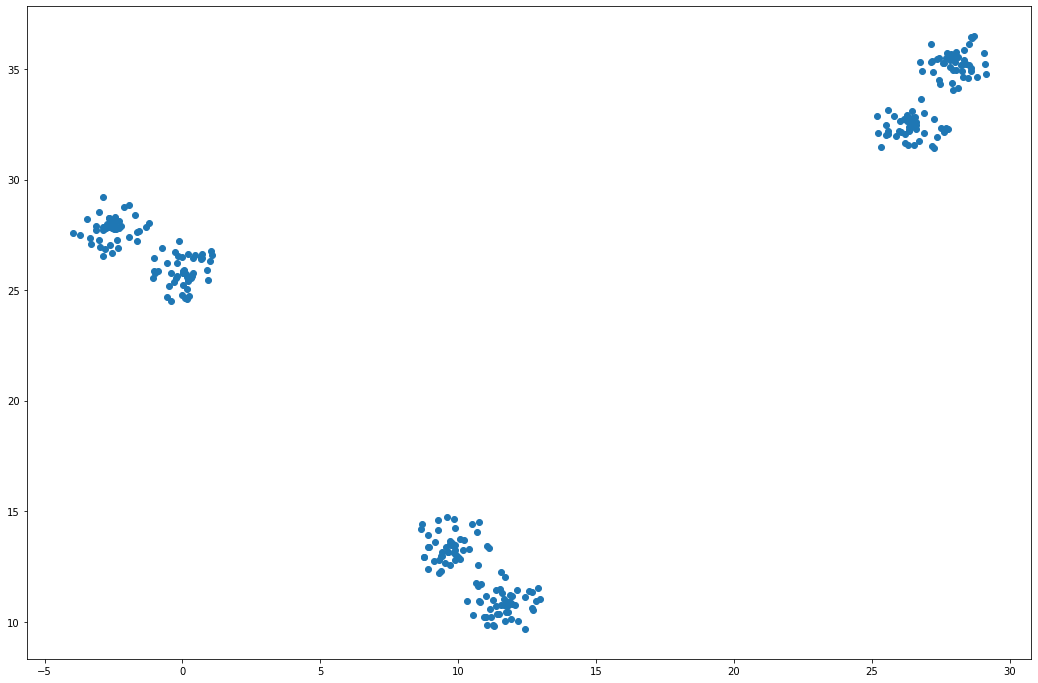

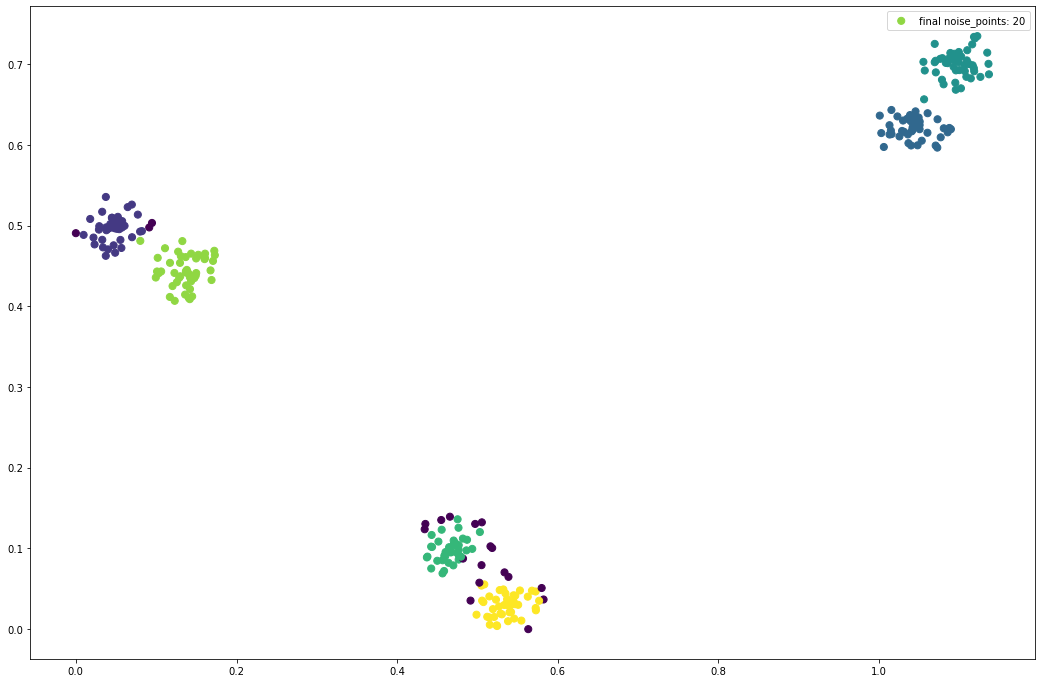

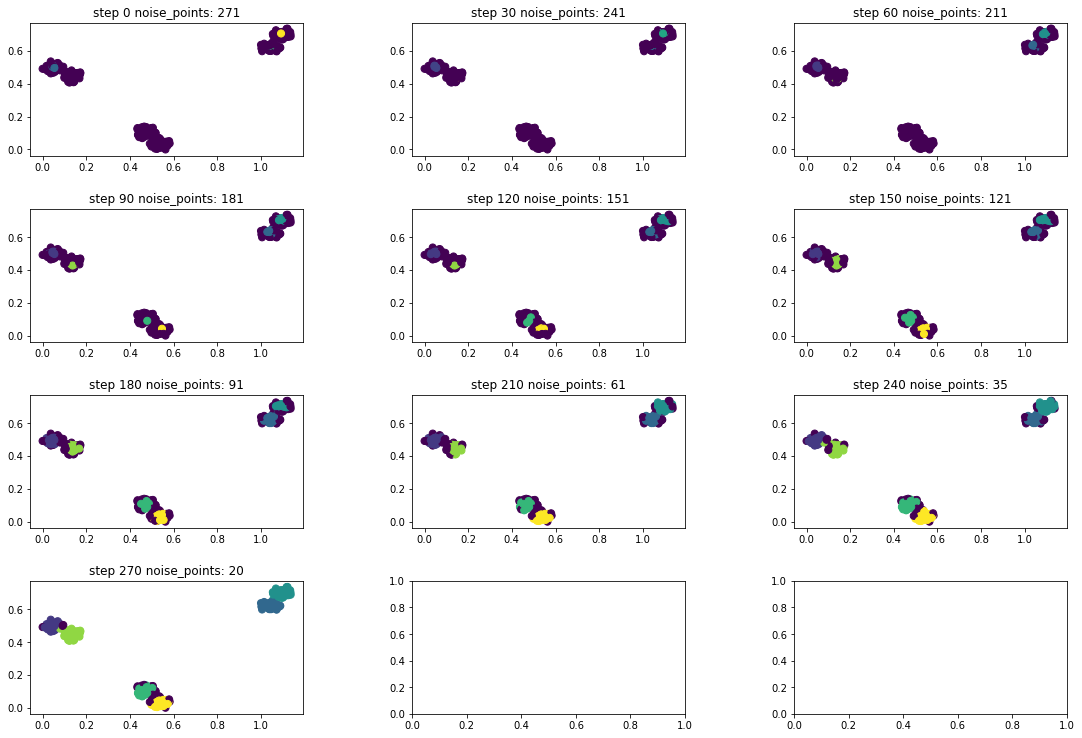

In [9]:
from generator.generator_lib import  Generator
g = Generator(4.0, 40, 300, 3)
points = g.generate_with_subclusters()
arr = np.array(points)
draw_everything(arr)

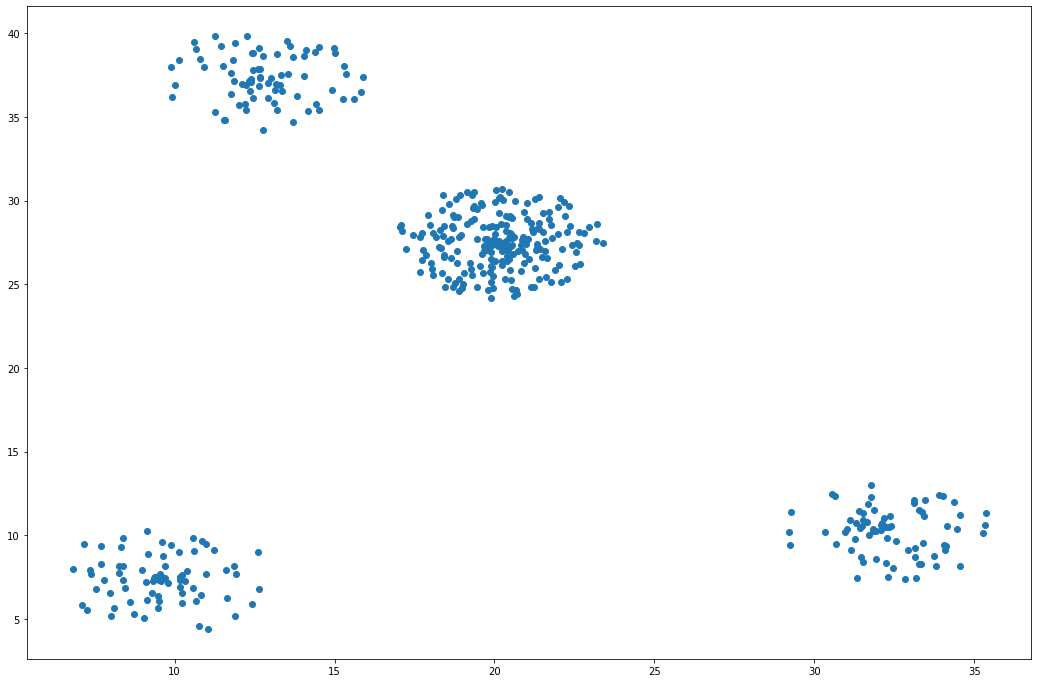

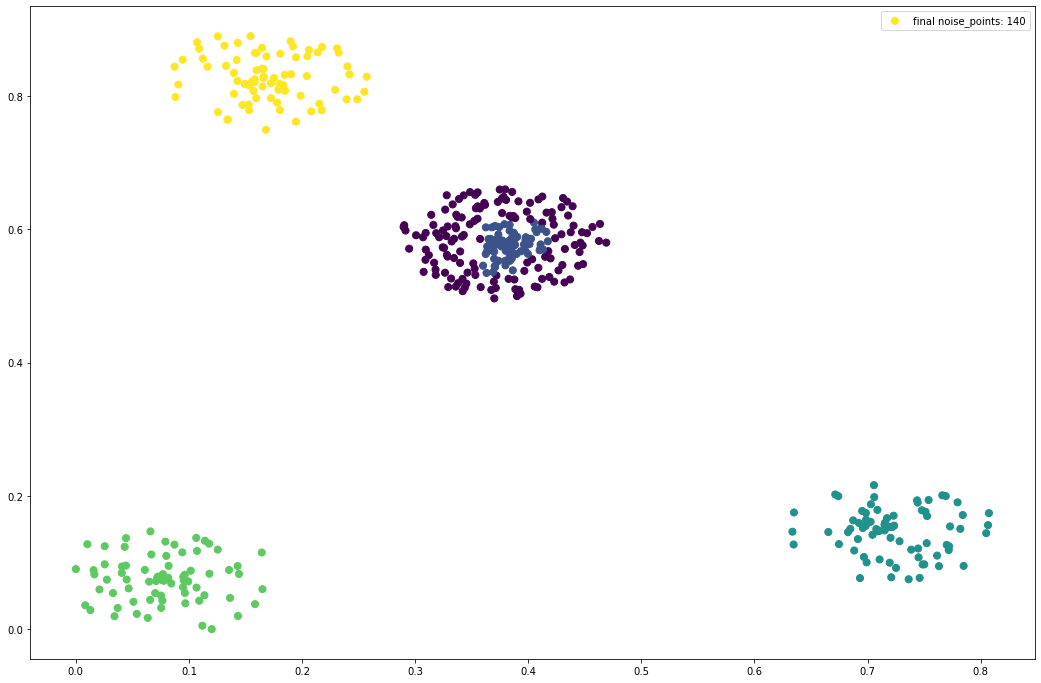

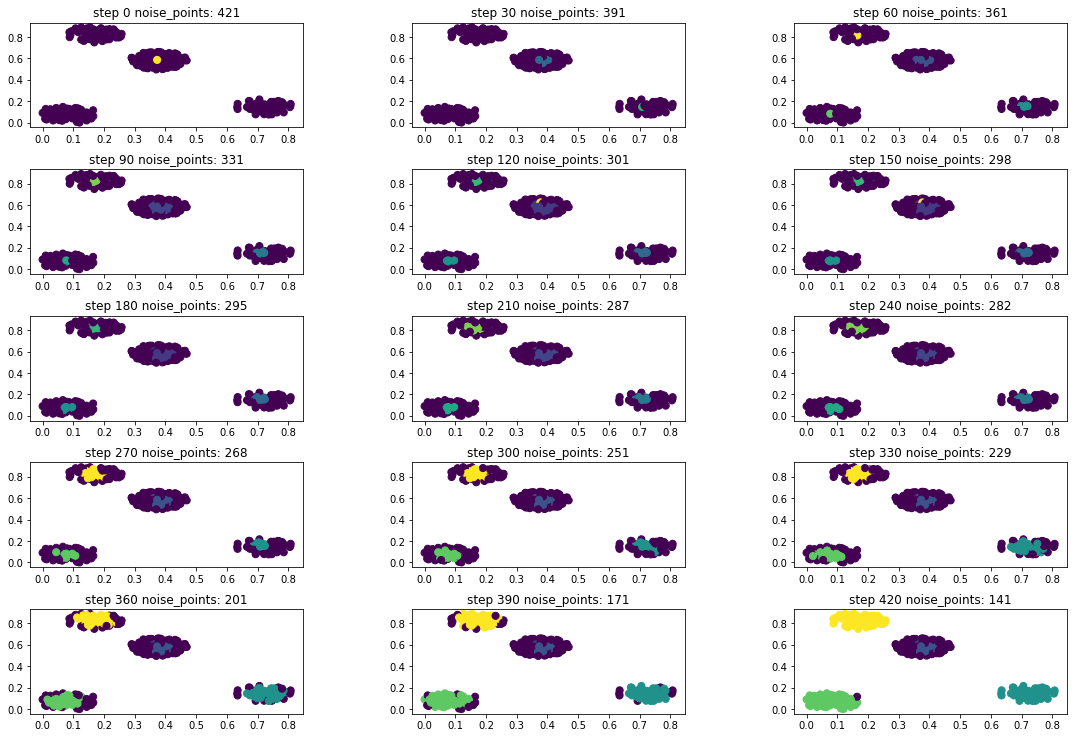

In [12]:
g = Generator(3.0, 40, 300, 4)
points = g.generate_with_density(3.0)
arr = np.array(points)
draw_everything(arr)

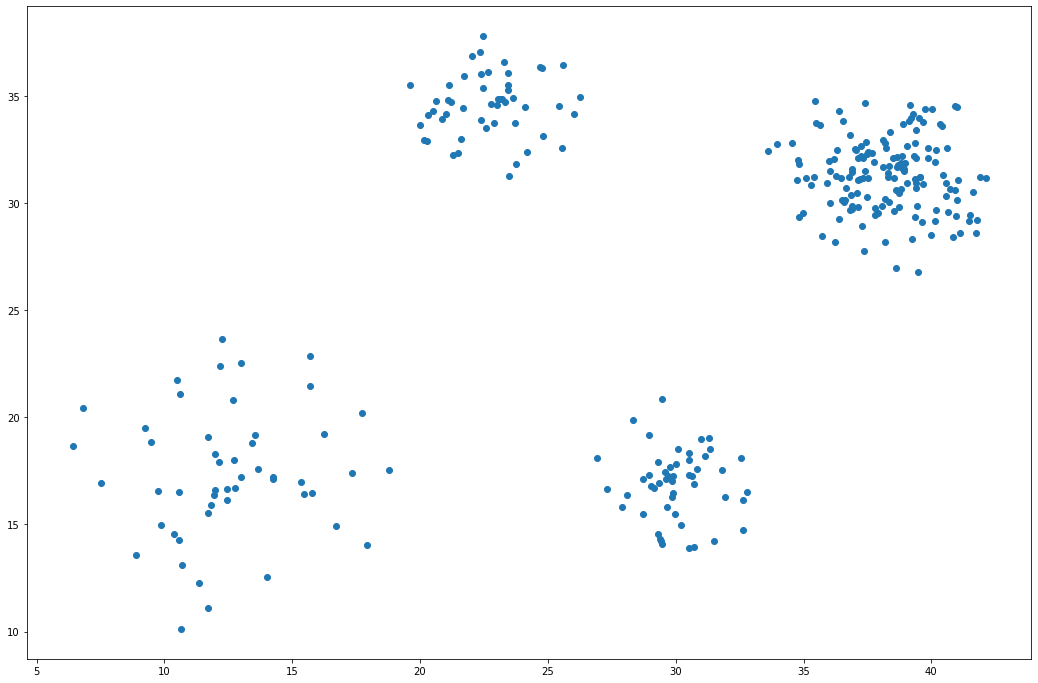

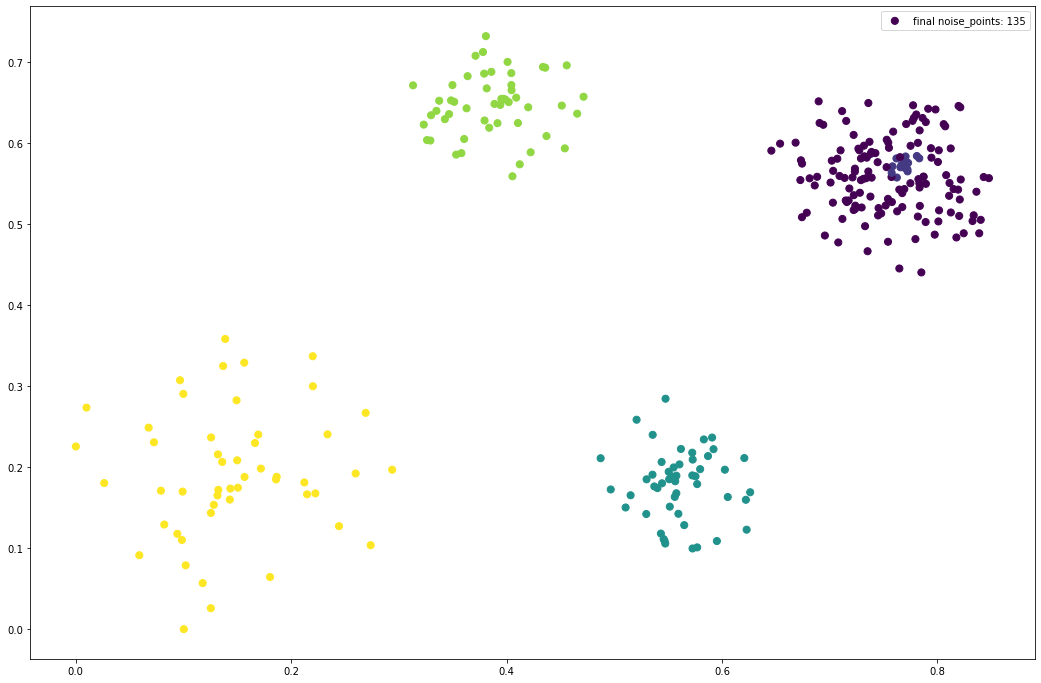

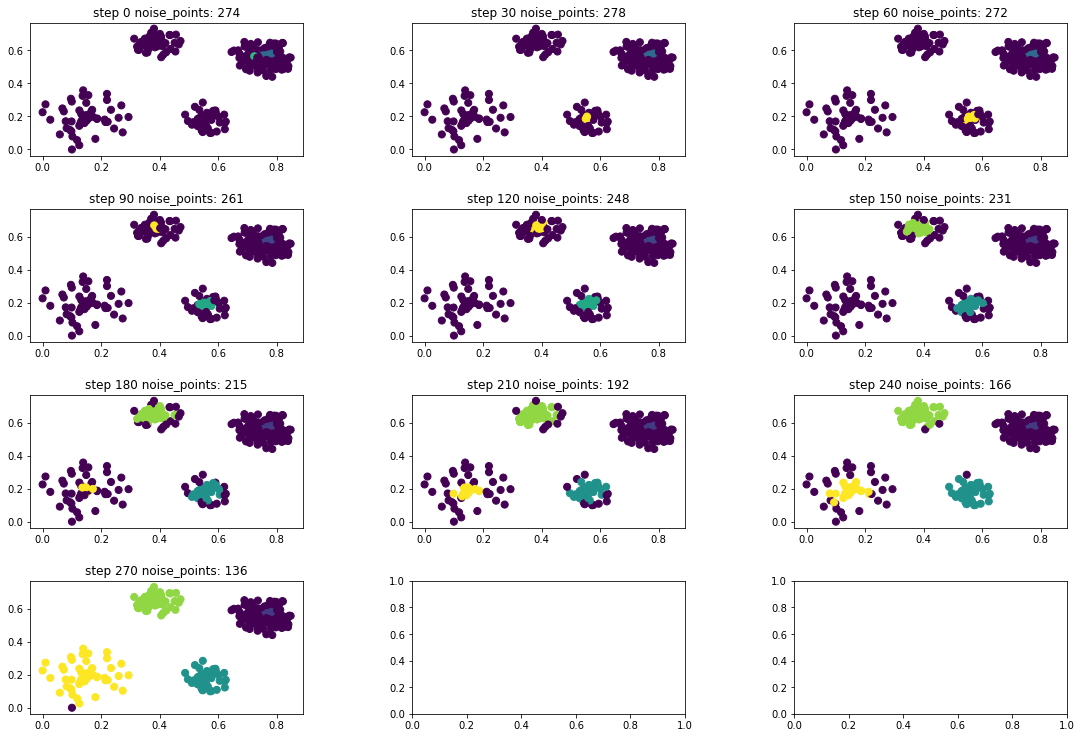

In [10]:
g = Generator(1.8, 40, 300, 6)
points = g.generate_with_skew(2.0)
arr = np.array(points)
draw_everything(arr)